In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras import datasets, layers, models


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

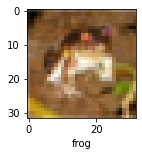

In [ ]:

plot_sample(X_train, y_train, 0)

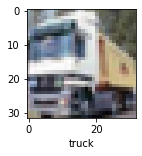

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
# model building

model = Sequential()
model.add(Flatten(input_shape = (32,32, 3)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

# add output layer
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
1250/1250 [==============================] - 18s 13ms/step - loss: 1.8943 - accuracy: 0.3106 - val_loss: 1.8140 - val_accuracy: 0.3340
Epoch 2/100
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7194 - accuracy: 0.3821 - val_loss: 1.7005 - val_accuracy: 0.3916
Epoch 3/100
1250/1250 [==============================] - 13s 11ms/step - loss: 1.6366 - accuracy: 0.4132 - val_loss: 1.6131 - val_accuracy: 0.4254
Epoch 4/100
1250/1250 [==============================] - 13s 11ms/step - loss: 1.5937 - accuracy: 0.4283 - val_loss: 1.6194 - val_accuracy: 0.4219
Epoch 5/100
1250/1250 [==============================] - 13s 11ms/step - loss: 1.5564 - accuracy: 0.4423 - val_loss: 1.5845 - val_accuracy: 0.4388
Epoch 6/100
1250/1250 [==============================] - 12s 10ms/step - loss: 1.5303 - accuracy: 0.4520 - val_loss: 1.5876 - val_accuracy: 0.4407
Epoch 7/100
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5118 - accuracy: 0.4588 - val_loss: 1

In [36]:
yprob=model.predict(X_test)
yprob[0]


313/313 [==============================] - 1s 3ms/step


array([0.00384685, 0.013055  , 0.01432221, 0.27019286, 0.33060336,
       0.21604818, 0.00770391, 0.00155614, 0.02657624, 0.11609524],
      dtype=float32)

In [37]:
ypred=yprob.argmax(axis=1)
ypred

array([4, 8, 8, ..., 3, 5, 7])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.44      0.64      0.52      1000
           1       0.62      0.52      0.57      1000
           2       0.34      0.39      0.37      1000
           3       0.32      0.31      0.31      1000
           4       0.41      0.41      0.41      1000
           5       0.41      0.37      0.39      1000
           6       0.54      0.45      0.49      1000
           7       0.55      0.51      0.53      1000
           8       0.67      0.53      0.59      1000
           9       0.48      0.55      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



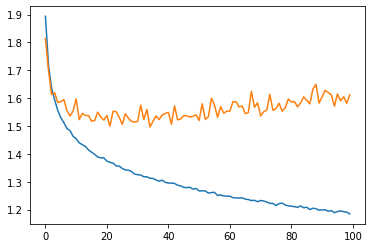

In [39]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])